# face mask detector at real time
### wirh deep Learing model and opencv

### detect on single image

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
########################################################################################################################################
# get my model 
import  tensorflow as tf
model=tf.keras.models.load_model(r"D:\Courses\Machine learning and Deep learning\mask facedetection projects\faceMakModel1.h5")


In [3]:
classes=["With Mask","WithOut Mask"]

print(classes)

['With Mask', 'WithOut Mask']


[[0.30071 0.69929]]
the face WithOut Mask


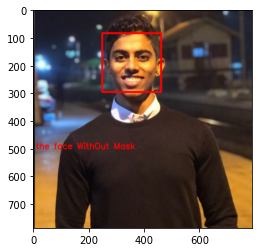

In [7]:


# prepare the image 
import numpy as np
from tensorflow.keras.preprocessing import image

faceFile = r'D:\Desktop 4-6-2020\me.jpg'

face_img = cv2.imread(faceFile)





#### show result


#do predication

face_cascade=cv2.CascadeClassifier(r"C:\Users\Microsoft\3.1 Computer-Vision-with-Python openCV.zip/data/haarcascades/haarcascade_frontalface_default.xml")
faces=face_cascade.detectMultiScale(face_img,scaleFactor=1.2 , minNeighbors=5 )
# specify font 
font = cv2.FONT_HERSHEY_SIMPLEX    
for (x,y,w,h) in  faces:
    face_rect=face_img[y:y+h,x:x+w]
    face_rect = np.array(face_rect)
    face_rect=cv2.resize(face_rect,(224,224))
    face_rect = face_rect/255
    face_rect = np.expand_dims(face_rect, axis=0)
    

    pred=model.predict(face_rect)
    print(pred)
    pred=np.argmax(pred)
    if pred==0:
        Color=(0,255,0)
    else :
        Color=(0,0,255)
    cv2.rectangle(face_img,(x,y), (x+w, y+h) , Color, 5)
    cv2.putText(face_img,text=f"the face {classes[pred]}",org=(10,500), fontFace=font,fontScale= 1,color=Color,thickness=2,lineType=cv2.LINE_AA)

    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

    print(f"the face {classes[pred]}")
    pred


# with real time 

In [8]:
import time
cap=cv2.VideoCapture(0)
fps=10

face_cascade=cv2.CascadeClassifier(r"C:\Users\Microsoft\3.1 Computer-Vision-with-Python openCV.zip/data/haarcascades/haarcascade_frontalface_default.xml")

    

while True:

    ret ,frame=cap.read()
    
    faces=face_cascade.detectMultiScale(frame,scaleFactor=1.2 , minNeighbors=5 )
    
    for (x,y,w,h) in  faces:
    
        ######## perpare frame

        face_rect=frame[y:y+h,x:x+w]
        face_rect = np.array(face_rect)
        face_rect=cv2.resize(face_rect,(224,224))
        face_rect = face_rect/255
        face_rect = np.expand_dims(face_rect, axis=0)


        # do predication

        pred=model.predict(face_rect)
        pred=np.argmax(pred)


        if pred==0:
            Color=(0,255,0)
        if pred==1:
            Color=(0,0,255)
        # plot result on image
        cv2.putText(frame,text=f"the face {classes[pred]}",org=(10,20), fontFace=font,fontScale= 0.5,color=Color,thickness=1,lineType=cv2.LINE_AA)
        cv2.rectangle(frame,(x,y), (x+w, y+h) , Color, 5)
        cv2.imshow("window",  frame )
    
    if cv2.waitKey(1) & 0xff==27:
        break

cap.release()
cv2.destroyAllWindows()

# real time result


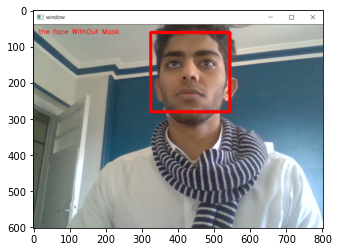

In [50]:
plt.imshow(plt.imread(r"C:\Users\Microsoft\Videos\Captures\window 27_02_2021 02_09_35 م.png"))